In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [ ]:
# Memuat Dataset train
train = pd.read_csv('train.csv')
train

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [ ]:
# Memuat dataset test
test = pd.read_csv('test.csv')
test

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694,3.0,No,5.0,5.0,No,9.0,6.0
6171,24695,8.0,Yes,2.0,1.0,Yes,0.0,0.0
6172,24696,2.0,No,4.0,3.0,No,9.0,7.0
6173,24697,3.0,No,4.0,4.0,No,11.0,9.0


In [ ]:
# Informasi dari Data train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
# Analysis Deskriptif
train.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [ ]:
# Cek missing values per fitur pada data train
print("\n Missing values per fitur: ")
print(train.isnull().sum())


 Missing values per fitur: 
id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64


In [ ]:
# Cek missing values per fitur pada data test
print("\n Missing values per fitur pada data test: ")
print(test.isnull().sum())


 Missing values per fitur pada data test: 
id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64


In [ ]:
# Cek data duplikat pada data train
print("\nJumlah data duplikat data train: ", train.duplicated().sum())

# Cek data duplikat pada data test
print("\nJumlah data duplikat data test: ", test.duplicated().sum())


Jumlah data duplikat data train:  0

Jumlah data duplikat data test:  0


##EDA

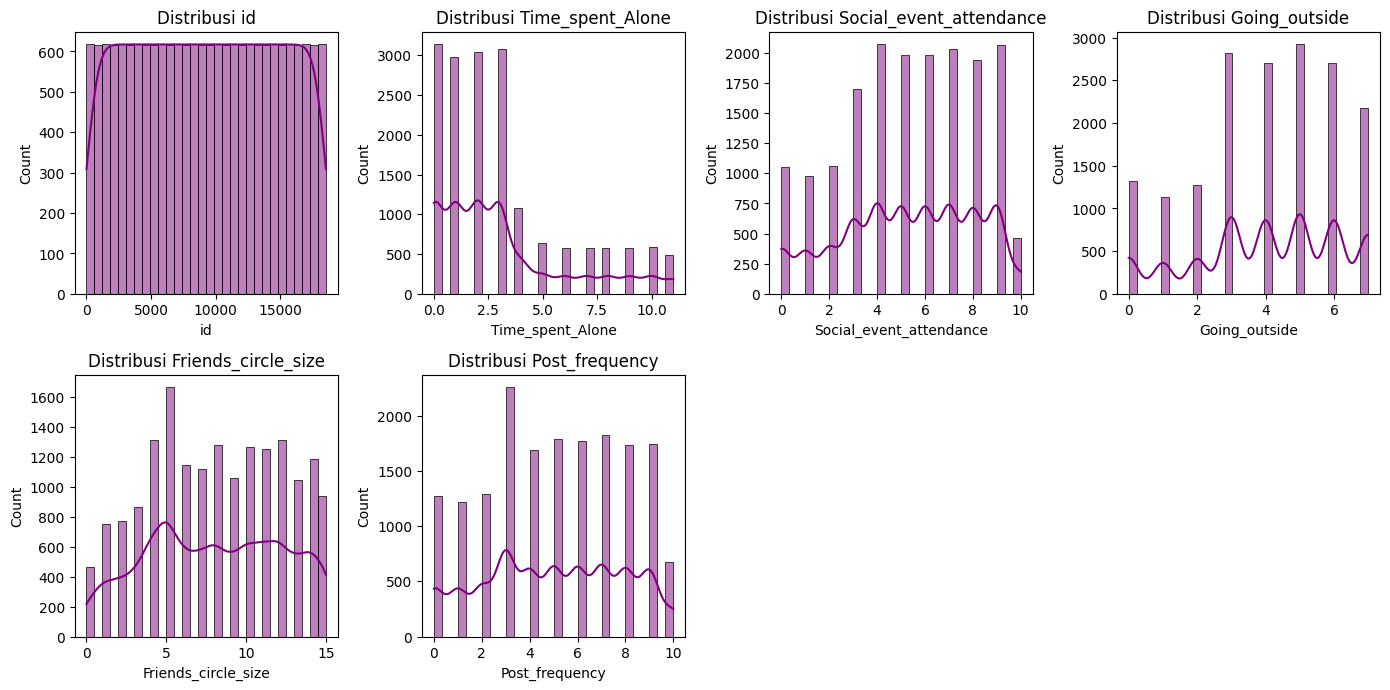

In [ ]:
# Ditribusi fitur numerik untuk data train
num_features = train.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(train[column], bins=30, kde=True, color='purple')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

/tmp/ipython-input-28-4009080616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train[column], palette='viridis')
/tmp/ipython-input-28-4009080616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train[column], palette='viridis')
/tmp/ipython-input-28-4009080616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train[column], palette='viridis')


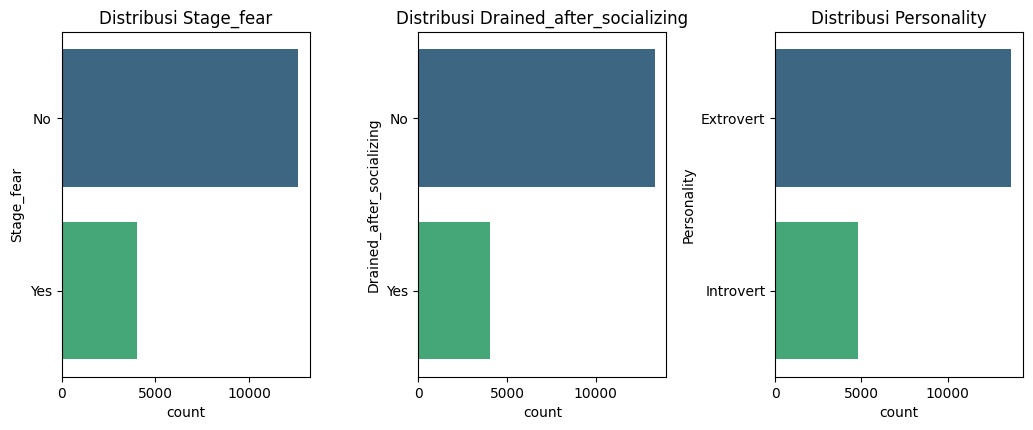

In [ ]:
# Distribusi fitur kategorikal pada data train
cat_features = train.select_dtypes(include=['object'])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=train[column], palette='viridis')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

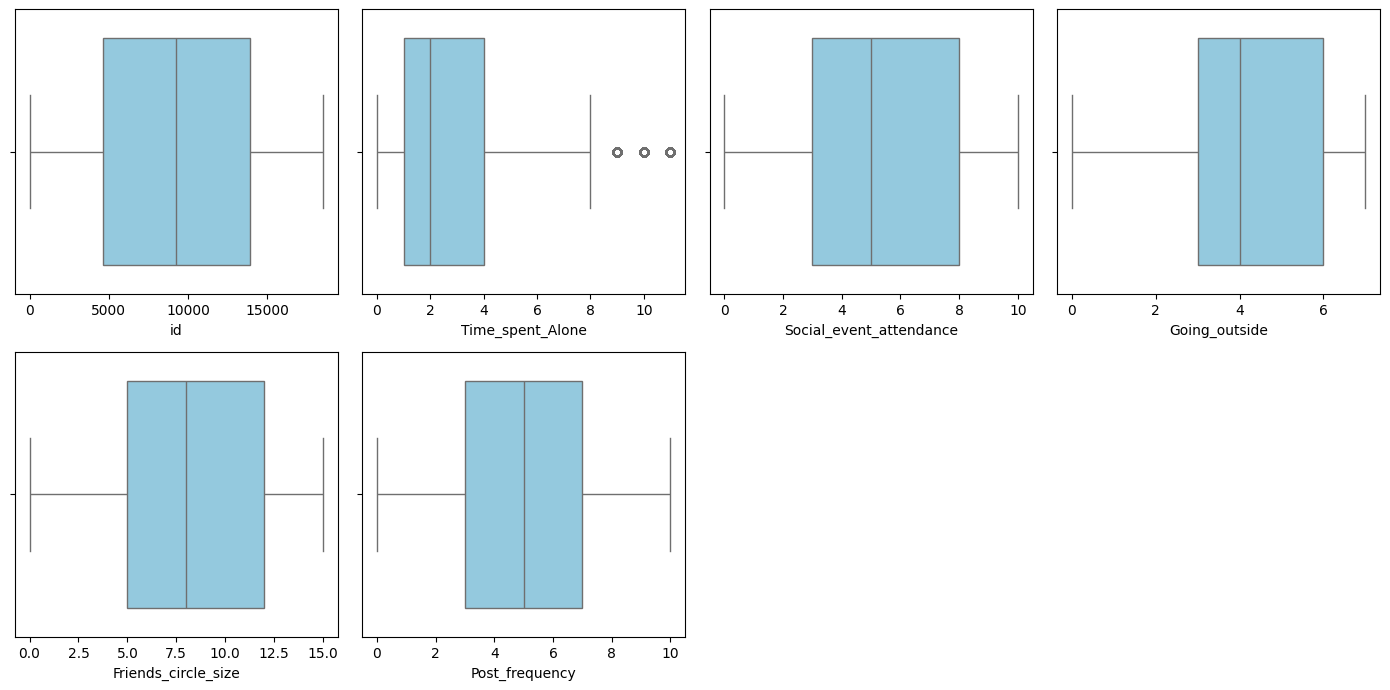

In [ ]:
# Cek outlier pada data train
numerical_features_train = train.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_features_train.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=train[column], color='skyblue')

plt.tight_layout()
plt.show()

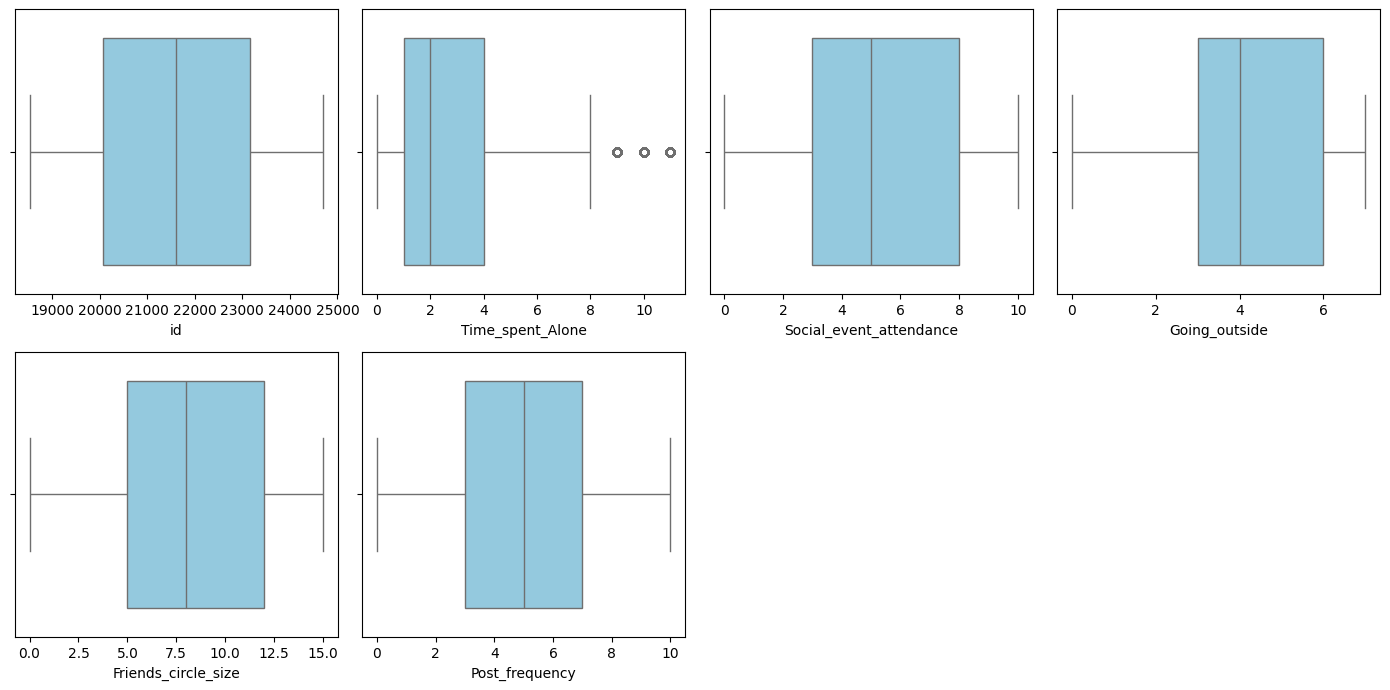

In [ ]:
# Cek outlier pada data test
numerical_features_test = test.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_features_test.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=test[column], color='skyblue')

plt.tight_layout()
plt.show()

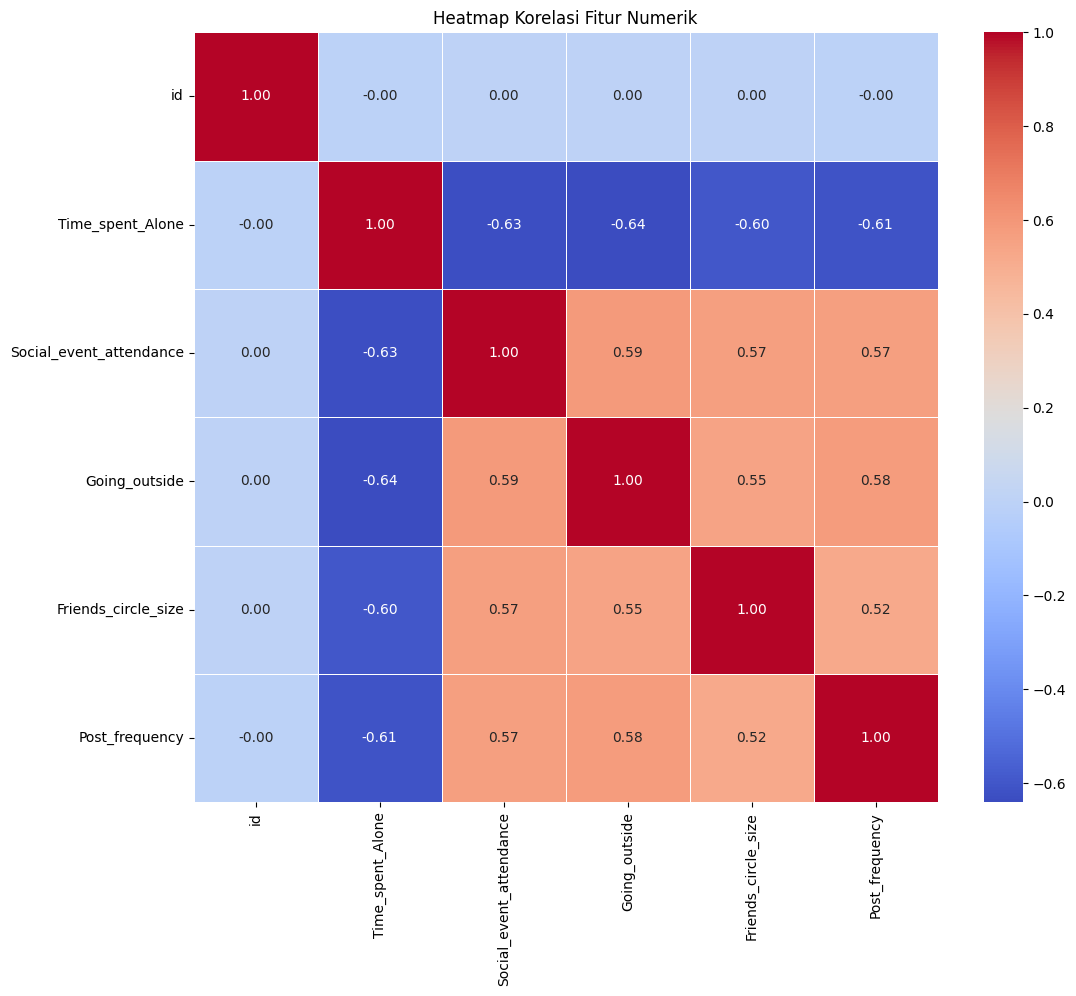

In [ ]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

## Model Pipeline

In [ ]:
X_train = train.drop('Personality', axis=1)
y_train = train['Personality']
X_test = test

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


In [ ]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, ['id', 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']),
    ('cat', categorical_pipeline, ['Stage_fear', 'Drained_after_socializing'])
])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [ ]:
# Cek missing values pada data train setelah preprocessing
print("Missing values in X_train_processed:", np.isnan(X_train_processed).sum())

# Cek missing values pada data test setelah preprocessing
print("Missing values in X_test_processed:", np.isnan(X_test_processed).sum())

Missing values in X_train_processed: 0
Missing values in X_test_processed: 0


In [ ]:
# Buat pipeline dengan PCA dan GradientBoostingClassifier
pipeline = ImbPipeline(steps=[
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(n_estimators=1000,random_state=42))
])

# Tentukan parameter grid untuk GridSearchCV
param_grid = {
    'pca__n_components': [2, 3],  # Contoh parameter untuk PCA
    'classifier__max_depth': [10, 20, None], # Coba batasi kedalaman pohon
    'classifier__min_samples_leaf': [1, 5, 10], # Coba tingkatkan jumlah sampel minimum di daun
    'classifier__min_samples_split': [1, 5, 10] # Coba tingkatkan jumlah sampel minimum untuk memisahkan node
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='accuracy', n_jobs=-1)

# Latih model dengan GridSearchCV
grid_search.fit(X_train_processed, y_train)

y_pred_train = grid_search.predict(X_train_processed)
# Tampilkan hasil terbaik
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)
print("\nConfusion Matrix: \n", confusion_matrix(y_train, y_pred_train))
print("\nClassification Report: \n", classification_report(y_train, y_pred_train))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 526, in fit
    self._final_estimator.fit(Xt, yt, *

Best parameters found:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 5, 'pca__n_components': 2}
Best accuracy found:  0.9688512200388686

Confusion Matrix: 
 [[13433   266]
 [  308  4517]]

Classification Report: 
               precision    recall  f1-score   support

   Extrovert       0.98      0.98      0.98     13699
   Introvert       0.94      0.94      0.94      4825

    accuracy                           0.97     18524
   macro avg       0.96      0.96      0.96     18524
weighted avg       0.97      0.97      0.97     18524



In [ ]:
y_pred_test = grid_search.predict(X_test_processed)

# Create a submission file
submission = pd.DataFrame({
    'id': test['id'],
    'Personality': y_pred_test
})
submission.to_csv('submission3.csv', index=False)